In [1]:
%load_ext nb_black
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
# Load the houseprices data from Thinkful's database.
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "houseprices"
table_name = "houseprices"

db_url = f"postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}"

engine = create_engine(db_url)

prices_df = pd.read_sql_query(f"SELECT * FROM {table_name};", con=engine)

# close the db connetion
engine.dispose()

<IPython.core.display.Javascript object>

In [3]:
prices_df2 = prices_df.copy()
cols_to_drop = [
    "lotfrontage",
    "fireplacequ",
    "fence",
    "alley",
    "miscfeature",
    "poolqc",
    "id",
]
prices_df2.drop(columns=cols_to_drop, inplace=True)
print(
    (prices_df2.isnull().sum() / prices_df2.isnull().count())
    .sort_values(ascending=False)
    .head(14)
)
prices_df2.head()



garagetype      0.055479
garageyrblt     0.055479
garagefinish    0.055479
garagequal      0.055479
garagecond      0.055479
bsmtfintype2    0.026027
bsmtexposure    0.026027
bsmtfintype1    0.025342
bsmtcond        0.025342
bsmtqual        0.025342
masvnrtype      0.005479
masvnrarea      0.005479
electrical      0.000685
yearremodadd    0.000000
dtype: float64


,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,...,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


<IPython.core.display.Javascript object>

In [4]:
cols_with_nulls = (
    (prices_df2.isnull().sum() / prices_df2.isnull().count())
    .sort_values(ascending=False)
    .head(13)
    .index
)

prices_df2.dropna(inplace=True)
(prices_df2.isnull().sum() / prices_df2.isnull().count()).sort_values(
    ascending=False
).head(12)

saleprice       0.0
roofstyle       0.0
exterior1st     0.0
exterior2nd     0.0
masvnrtype      0.0
masvnrarea      0.0
exterqual       0.0
extercond       0.0
foundation      0.0
bsmtqual        0.0
bsmtcond        0.0
bsmtexposure    0.0
dtype: float64

<IPython.core.display.Javascript object>

In [5]:
y = prices_df2["saleprice"]
X = prices_df2.select_dtypes(include="number")
X = X.drop("saleprice", axis=1)

<IPython.core.display.Javascript object>

In [6]:
# Split your data into train and test sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<IPython.core.display.Javascript object>

#### Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.

In [7]:
import statsmodels.api as sm

X_train_constant = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train_constant).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     118.8
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:39:07   Log-Likelihood:                -12725.
No. Observations:                1070   AIC:                         2.552e+04
Df Residuals:                    1036   BIC:                         2.569e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.31e+05    1.7e+06      0.077      0.939   -3.21e+06    3.47e+06
mssubclass     -174.3426     33.054     -5.275      0.000    -239.203    -109.482
lotarea           0.2056      0.136      1.511      0.131      -0.061       0.473
overallqual    1.864e+04   1506.480     12.372      0.000    1.57e+04    2.16e+04
overallcond    5012.3433   1318.355      3.802      0.000    2425.392    7599.294
yearbuilt       373.6313     89.291      4.184      0.000     198.419     548.843
yearremodadd    158.7443     87.199      1.820      0.069     -12.363     329.851
masvnrarea       22.8359      7.123      3.206      0.001       8.859      36.813
bsmtfinsf1        9.3689      3.083      3.039      0.002       3.320      15.418
bsmtfinsf2        1.8990      5.462      0.348      0.728      -8.818      12.616
bsmtunfsf         0.6188      3.164      0.196      0.845      -5.590       6.827
totalbsmtsf      11.8868      5.525      2.152      0.032       1.046      22.728
firstflrsf       10.3093     10.183      1.012      0.312      -9.672      30.291
secondflrsf      20.1491      9.145      2.203      0.028       2.203      38.095
lowqualfinsf     -4.5640     25.650     -0.178      0.859     -54.895      45.767
grlivarea        25.8944      9.356      2.768      0.006       7.535      44.254
bsmtfullbath   9283.3486   3169.389      2.929      0.003    3064.194    1.55e+04
bsmthalfbath   3878.2134   4795.535      0.809      0.419   -5531.856    1.33e+04
fullbath        733.6435   3524.756      0.208      0.835   -6182.833    7650.120
halfbath      -4764.4611   3300.378     -1.444      0.149   -1.12e+04    1711.728
bedroomabvgr  -9446.0737   2182.064     -4.329      0.000   -1.37e+04   -5164.304
kitchenabvgr  -2.494e+04   7354.766     -3.391      0.001   -3.94e+04   -1.05e+04
totrmsabvgrd   6259.5362   1504.787      4.160      0.000    3306.759    9212.313
fireplaces     5073.5615   2135.830      2.375      0.018     882.515    9264.608
garageyrblt     -98.7880     94.611     -1.044      0.297    -284.439      86.863
garagecars     1.524e+04   3555.286      4.287      0.000    8266.770    2.22e+04
garagearea       11.8310     12.242      0.966      0.334     -12.192      35.854
wooddecksf       25.6660      9.757      2.630      0.009       6.520      44.812
openporchsf      -7.0360     18.921     -0.372      0.710     -44.164      30.092
enclosedporch    12.5311     21.289      0.589      0.556     -29.243      54.305
threessnporch    25.1886     35.405      0.711      0.477     -44.285      94.663
screenporch      33.1093     20.617      1.606      0.109      -7.347      73.566
poolarea        -14.9284     26.024     -0.574      0.566     -65.994      36.137
miscval          -0.0919      2.202     -0.042      0.967      -4.413       4.230
mosold         -264.6889    423.209     -0.625   

<IPython.core.display.Javascript object>

#### Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.

In [8]:
X_test_constant = sm.add_constant(X_test)
y_test_pred = results.predict(X_test_constant)

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Predicted prices')

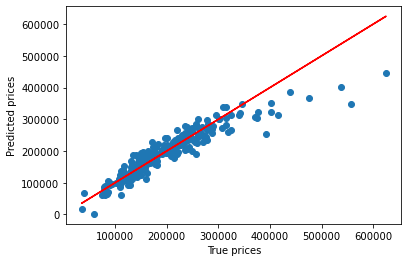

<IPython.core.display.Javascript object>

In [9]:
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color="r")
plt.xlabel("True prices")
plt.ylabel("Predicted prices")

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(
    f"Mean absolute error: {mean_absolute_error(y_test, y_test_pred)}\n"
    f"MSE: {mean_squared_error(y_test, y_test_pred)}\n"
    f"RMSE: {mean_squared_error(y_test, y_test_pred, squared=False)}\n"
    f"MAPE: {np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100}"
)

Mean absolute error: 20422.940180930123
MSE: 1024526177.564161
RMSE: 32008.2204685634
MAPE: 10.675509456160356


<IPython.core.display.Javascript object>

In [11]:
significant_cols = list(results.pvalues.loc[results.pvalues < 0.05].index)
significant_cols

['mssubclass',
 'overallqual',
 'overallcond',
 'yearbuilt',
 'masvnrarea',
 'bsmtfinsf1',
 'totalbsmtsf',
 'secondflrsf',
 'grlivarea',
 'bsmtfullbath',
 'bedroomabvgr',
 'kitchenabvgr',
 'totrmsabvgrd',
 'fireplaces',
 'garagecars',
 'wooddecksf']

<IPython.core.display.Javascript object>

In [12]:
X = prices_df2[significant_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_constant = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train_constant).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     246.7
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:39:07   Log-Likelihood:                -12741.
No. Observations:                1070   AIC:                         2.552e+04
Df Residuals:                    1053   BIC:                         2.560e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -7.12e+05   1.13e+05     -6.278      0.000   -9.35e+05   -4.89e+05
mssubclass    -169.5260     32.873     -5.157      0.000    -234.030    -105.022
overallqual   1.917e+04   1433.135     13.379      0.000    1.64e+04     2.2e+04
overallcond   6059.8017   1183.824      5.119      0.000    3736.880    8382.724
yearbuilt      325.5488     57.333      5.678      0.000     213.049     438.049
masvnrarea      25.7289      7.009      3.671      0.000      11.975      39.483
bsmtfinsf1       8.2291      3.577      2.300      0.022       1.210      15.248
totalbsmtsf      9.4704      6.735      1.406      0.160      -3.745      22.685
secondflrsf      2.0248      6.935      0.292      0.770     -11.584      15.634
grlivarea       45.3486      7.688      5.899      0.000      30.264      60.433
bsmtfullbath  1.025e+04   2826.664      3.628      0.000    4708.303    1.58e+04
bedroomabvgr -8326.3800   2032.604     -4.096      0.000   -1.23e+04   -4337.965
kitchenabvgr -2.455e+04   7469.223     -3.287      0.001   -3.92e+04   -9895.300
totrmsabvgrd  4874.3441   1517.585      3.212      0.001    1896.509    7852.179
fireplaces    6235.3351   2014.627      3.095      0.002    2282.195    1.02e+04
garagecars    1.662e+04   2422.330      6.860      0.000    1.19e+04    2.14e+04
wooddecksf      27.7890      9.202      3.020      0.003       9.733      45.844
==============================================================================
Omnibus:                      513.268   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76175.488
Skew:                          -1.131   Prob(JB):                         0.00
Kurtosis:                      44.273   Cond. No.                     2.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Predicted prices')

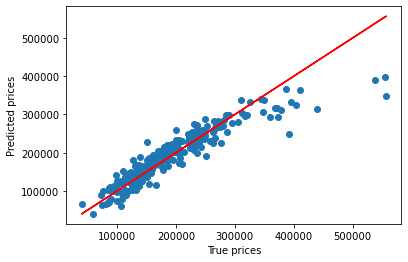

<IPython.core.display.Javascript object>

In [13]:
X_test_constant = sm.add_constant(X_test)
y_test_pred = results.predict(X_test_constant)
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color="r")
plt.xlabel("True prices")
plt.ylabel("Predicted prices")


In [14]:
print(
    f"Mean absolute error: {mean_absolute_error(y_test, y_test_pred)}\n"
    f"MSE: {mean_squared_error(y_test, y_test_pred)}\n"
    f"RMSE: {mean_squared_error(y_test, y_test_pred, squared=False)}\n"
    f"MAPE: {np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100}"
)

Mean absolute error: 20950.74267411103
MSE: 1010413383.6740065
RMSE: 31787.00023081773
MAPE: 11.45228617228427


<IPython.core.display.Javascript object>